# Plotting model performance on data with more layers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Fold 0 - MSE: 0.0616, R2: 0.5757
Fold 1 - MSE: 0.0813, R2: 0.5179
Fold 2 - MSE: 0.0718, R2: 0.6007
Fold 3 - MSE: 0.0975, R2: 0.4145
Fold 4 - MSE: 0.0746, R2: 0.5955
MSE: 0.07180968573928634; R2: 0.6006527407673101
Evaluation of best model - MSE: 0.0718, R2: 0.6007
[ 1.15228828e+00 -7.52521489e-04 -4.52426175e-03 -6.02017191e-03
  2.53495103e-02 -6.02017191e-03  1.70478276e-02  9.10090369e-02
 -1.47088970e-01  2.32660554e-02  1.57660499e-02]
-0.08352586190080018
Fold 0 - MSE: 0.0644, R2: 0.5563
Fold 1 - MSE: 0.0868, R2: 0.4854
Fold 2 - MSE: 0.0651, R2: 0.6381
Fold 3 - MSE: 0.0997, R2: 0.4013
Fold 4 - MSE: 0.0690, R2: 0.6260
MSE: 0.06507077948548726; R2: 0.6381290744258543
Evaluation of best model - MSE: 0.0651, R2: 0.6381
Best model - MSE: 0.0872, R2: 0.5270
Evaluation of best model - MSE: 0.0821, R2: 0.4472


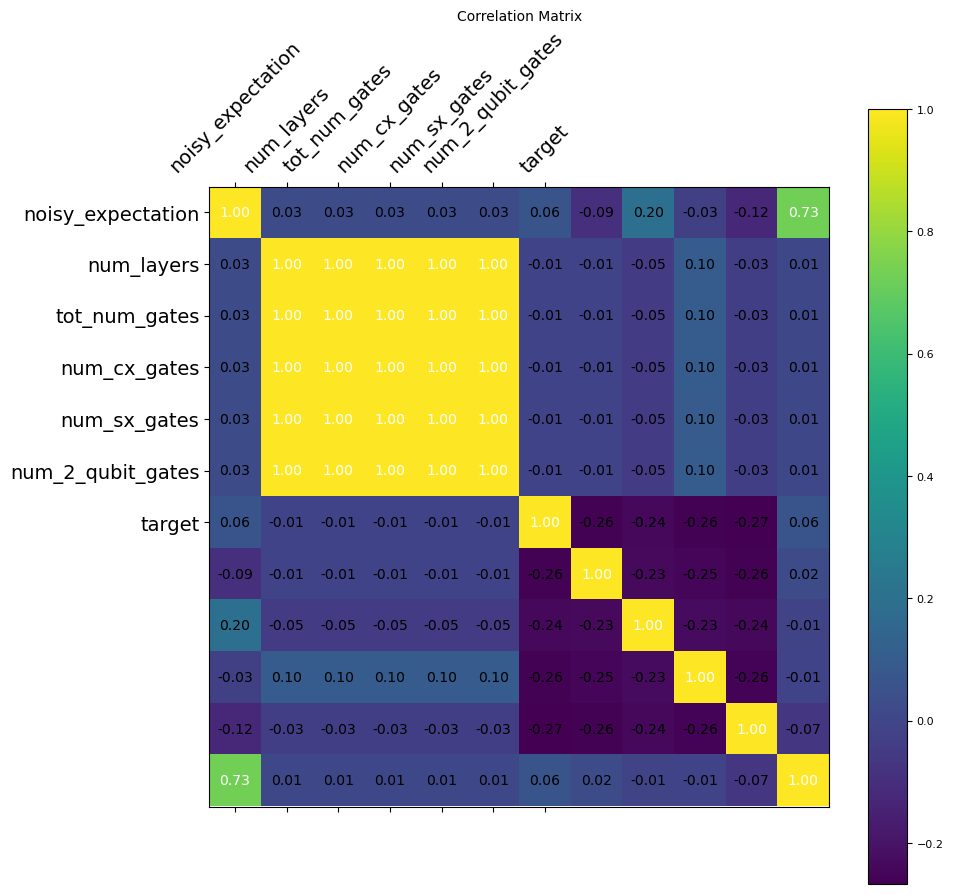

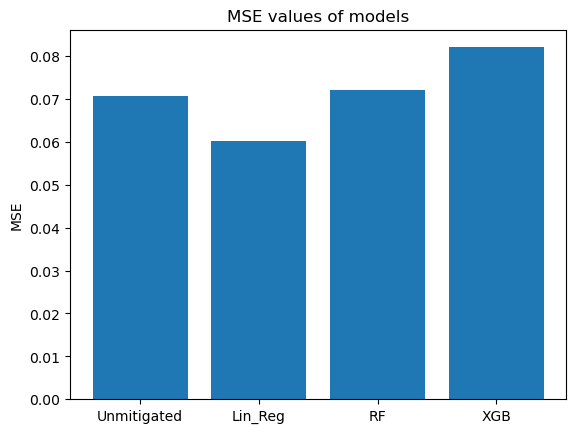

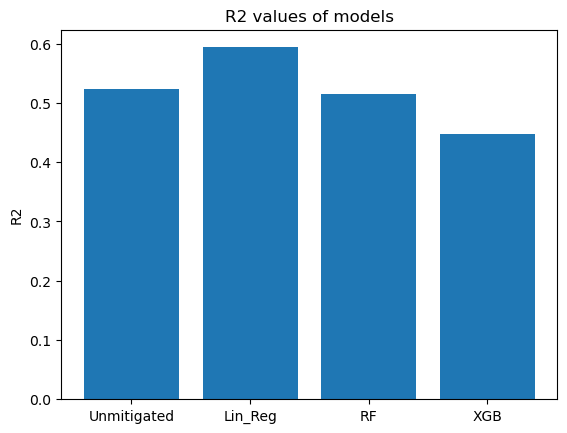

[[ 1.1216646e+00 -2.4618697e-03 -2.8624609e-03 -2.7975920e-03]
 [-5.2955630e-03  1.1233268e+00 -2.4385452e-03 -1.4796257e-03]
 [-3.6180143e-03 -2.8818250e-03  1.1190038e+00  1.6742945e-04]
 [-2.3743168e-03 -3.0452609e-03  1.2800395e-03  1.1206498e+00]]
[0.05158463 0.05154502 0.04959808 0.05179308]
4
58
[ 1.15228828e+00 -7.52521489e-04 -4.52426175e-03 -6.02017191e-03
  2.53495103e-02 -6.02017191e-03  1.70478276e-02  9.10090369e-02
 -1.47088970e-01  2.32660554e-02  1.57660499e-02]
-0.08352586190080018


In [2]:
%run dataset.ipynb  # allows to use defined functions from other notebook

### for now used eval dataset produced from old pickle files and added new ones with more layers

In [5]:
model_lr, _, _ = Linear_Reg()
model_rf, _, _ = Random_Forest()

_, old_pickle_files = split_data()
_, new_pickle_files = split_data(path='./extrapolation', train_frac=0) # path to pickle files with different num_layers
y_eval_ipol = file_to_data(old_pickle_files)    # is df

a = list()
for i, idx in enumerate(new_pickle_files):
    a.append(extract_features(f"./extrapolation/{idx}"))
df = pd.DataFrame(a)

y_eval_ipol = pd.concat([y_eval_ipol, df])

y_ipol_pred_lr = model_lr.predict(y_eval_ipol.drop(columns='target'))
y_ipol_pred_rf = model_rf.predict(y_eval_ipol.drop(columns='target'))

Fold 0 - MSE: 0.0616, R2: 0.5757
Fold 1 - MSE: 0.0813, R2: 0.5179
Fold 2 - MSE: 0.0718, R2: 0.6007
Fold 3 - MSE: 0.0975, R2: 0.4145
Fold 4 - MSE: 0.0746, R2: 0.5955
Fold 0 - MSE: 0.0640, R2: 0.5591
Fold 1 - MSE: 0.0865, R2: 0.4876
Fold 2 - MSE: 0.0657, R2: 0.6344
Fold 3 - MSE: 0.0972, R2: 0.4163
Fold 4 - MSE: 0.0665, R2: 0.6393


Text(0.5, 1.0, 'Error interpolation of models')

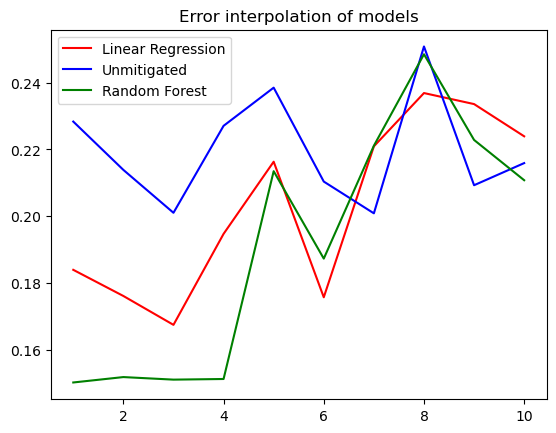

In [6]:
error_arr_unmi = []
error_arr_lr = []
error_arr_rf = []

x = range(1,11)

for j in x:
    # calculate errors for each number of layer
    y_cor_layers = y_eval_ipol['num_layers'] == j
    y_cor_layers_pred_lr = y_ipol_pred_lr[np.array(y_cor_layers)]
    y_cor_layers_pred_rf = y_ipol_pred_rf[np.array(y_cor_layers)]
    y_cor_layers_target = y_eval_ipol[np.array(y_cor_layers)]['target']
    
    # calculate mean error of unmitigated model
    error_unmi = sum(np.abs(y_eval_ipol[np.array(y_cor_layers)]['noisy_expectation'] - y_cor_layers_target))
    error_unmi /= y_cor_layers.sum()
    error_arr_unmi.append(error_unmi)
    
    # calculate mean error of LR model
    error = sum(np.abs(y_cor_layers_pred_lr - y_cor_layers_target))
    error /= y_cor_layers.sum()
    error_arr_lr.append(error)

    # calculate mean error of RF model
    error = sum(np.abs(y_cor_layers_pred_rf - y_cor_layers_target))
    error /= y_cor_layers.sum()
    error_arr_rf.append(error)


plt.plot(x, error_arr_lr, color='red', label = 'Linear Regression')
plt.plot(x, error_arr_unmi, color='blue', label = 'Unmitigated')
plt.plot(x, error_arr_rf, color='green', label = 'Random Forest')
plt.legend()
plt.title('Error interpolation of models')
